compute average connectivity between networks. two ways for that. we take approach 1.
1. compute network average time series, then network correlation
2. take correlation between pair seeds, then average on networks. COMPUTATION HEAVY.

we're doing that for Yeo's 7 and 17 networks

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
EPOCHS = ['baseline', 'early', 'late']

In [3]:
import pandas as pd

# the list of subjects, removed erroneous ones
subjects = pd.read_csv('data/subjects.csv')
S = subjects.int_id

In [4]:
# compute average timeseries within networks. for each subject

In [5]:
# load regions and networks

In [6]:
regions_networks = pd.read_csv('data/regions_sorted.csv')
regions_networks = regions_networks.set_index('region')[['7net', '17net']]
regions_networks

,7net,17net
region,,
7Networks_LH_Vis_1,Vis,DorsAttnA
7Networks_LH_Vis_2,Vis,VisCent
7Networks_LH_Vis_3,Vis,DorsAttnA
7Networks_LH_Vis_4,Vis,VisCent
7Networks_LH_Vis_5,Vis,DefaultC
...,...,...
Right Putamen,Striatum,StriatumRight
Right Pallidum,Striatum,StriatumRight
Right Hippocampus,Striatum,StriatumRight


In [7]:
import seaborn

<AxesSubplot:xlabel='7net', ylabel='count'>

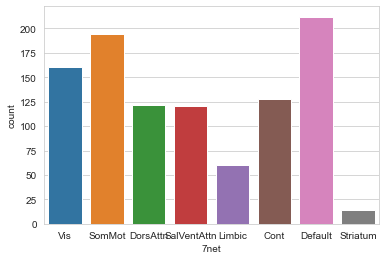

In [8]:
seaborn.countplot(x='7net', data=regions_networks)

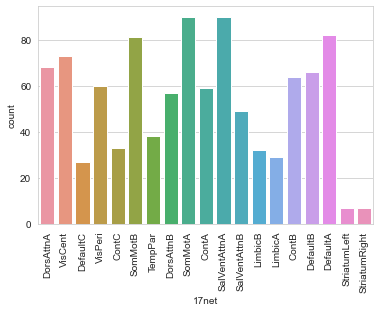

In [50]:
ax = seaborn.countplot(x='17net', data=regions_networks)
ax.tick_params(axis='x', rotation=90)

In [10]:
# merge region with networks

In [9]:
# in data/ts/ we don't have cerebellum regions included. only 1012 regions.
def timeseries(subject, epoch): return pd.read_csv('data/ts/ts_'+str(subject)+'_'+epoch+'.csv')

In [116]:
timeseries(2, 'early').head()

,7Networks_LH_Vis_1,7Networks_LH_Vis_2,7Networks_LH_Vis_3,7Networks_LH_Vis_4,7Networks_LH_Vis_5,7Networks_LH_Vis_6,7Networks_LH_Vis_7,7Networks_LH_Vis_8,7Networks_LH_Vis_9,7Networks_LH_Vis_10,...,Left Hippocampus,Left Amygdala,Left Accumbens,Right Thalamus,Right Caudate,Right Putamen,Right Pallidum,Right Hippocampus,Right Amygdala,Right Accumbens
0,1.014596,-1.091588,-0.689694,1.241627,-0.340570,1.720721,0.967533,2.293730,2.010316,0.412217,...,-1.041489,-0.267003,-1.416582,-0.402665,-0.300350,-1.430332,-2.075004,-1.319881,-1.408298,-0.569785
1,-0.017981,-1.246902,-0.852229,0.497946,-0.180009,0.484244,0.425367,1.641563,0.102473,-1.044337,...,-0.737525,0.044909,-2.259635,0.334256,-0.257205,0.400759,-0.398104,-0.939234,-2.596470,-1.808215
2,-0.046829,-0.007308,-0.762256,0.290625,-0.038755,-0.193949,0.730557,0.711252,-0.510087,-1.367109,...,-1.121351,-1.474220,-0.968535,0.697382,-0.369876,-1.007650,0.673828,-1.164878,-2.246602,-1.127759
3,0.718207,1.897450,-0.633628,0.391128,-0.195887,-0.501972,1.481817,-0.274806,-0.275330,-0.914403,...,-0.584375,0.906345,-0.610170,0.917716,-0.400169,-0.623450,0.547832,1.019793,1.458249,-1.674909
4,1.196477,2.909276,-0.356611,0.356384,-0.403450,-0.980221,1.236471,-1.010066,-0.495124,-0.742500,...,-0.982943,0.124179,-3.054952,1.013425,-1.134643,-2.684311,-0.671150,-0.548500,-0.358232,-3.052191


In [117]:
# how to average on network
# t = timeseries(1, 'baseline')
# t = t.transpose().join(regions_networks)
# t = t.set_index(['7net', '17net'], append=True).reorder_levels([1,2,0])
# t7net = t.groupby(level=0).mean().transpose()
# t7net

In [13]:
def ts_network(subject, epoch, net='7'):
    ts = timeseries(subject, epoch)
    ts = ts.transpose().join(regions_networks)
    ts = ts.set_index(['7net', '17net'], append=True).reorder_levels([1, 2, 0])
    assert net in ['7', '17']
    net_level = 0 if net == '7' else 1
    return ts.groupby(level=net_level).mean().transpose()

In [118]:
ts_network(2, 'baseline', net='17').head()

17net,ContA,ContB,ContC,DefaultA,DefaultB,DefaultC,DorsAttnA,DorsAttnB,LimbicA,LimbicB,SalVentAttnA,SalVentAttnB,SomMotA,SomMotB,StriatumLeft,StriatumRight,TempPar,VisCent,VisPeri
0,-0.271466,-0.225247,0.512717,0.134107,-0.325829,-0.265444,0.298597,-0.393778,0.188204,0.081478,-0.366279,0.032374,-0.737209,-0.681659,-0.804624,-0.186852,0.102076,0.301120,0.251590
1,-0.214743,-0.121366,0.404051,0.201975,-0.142574,0.456497,0.337778,-0.290238,0.461568,-0.025321,-0.528412,-0.260402,-0.765987,-0.267829,-0.928334,-1.123614,0.382730,0.221688,0.657475
2,0.125442,0.302262,0.189635,-0.047995,0.247620,0.519983,0.216033,0.122925,0.465943,-0.162170,-0.205494,0.080139,-0.091006,0.143214,0.875735,-0.250954,0.310457,0.064902,0.671094
3,0.480974,0.657125,-0.032846,-0.484319,0.325700,-0.067671,0.105216,0.511967,0.159756,-0.216873,0.203797,0.620952,0.573956,0.018393,1.167302,1.305232,-0.101963,-0.062350,0.178439
4,0.511548,0.527805,-0.214900,-0.707655,-0.070318,-0.611352,0.090991,0.477675,-0.254821,-0.206059,0.264190,0.649294,0.562045,-0.524451,0.111903,0.111105,-0.495594,-0.212461,-0.521704


In [ ]:
import numpy as np
from nilearn.connectome import ConnectivityMeasure

In [ ]:
def cmat(ts: pd.DataFrame, fill_diag=False, kind='covariance') -> np.ndarray:
    conn_measure = ConnectivityMeasure(kind=kind)
    cmat = conn_measure.fit_transform([ts.to_numpy()])[0]
    if fill_diag:   np.fill_diagonal(cmat, 0)
    return cmat

In [120]:
cmat(ts_network(2, 'baseline', net='7'))

array([[0.20128   , 0.08796555, 0.14220244, 0.04934644, 0.0796673 ,
        0.0715216 , 0.02750368, 0.08059784],
       [0.08796555, 0.18830523, 0.05228399, 0.09179708, 0.04777129,
        0.07417015, 0.0710281 , 0.08992052],
       [0.14220244, 0.05228399, 0.24852609, 0.03609152, 0.10035155,
        0.08770394, 0.02751952, 0.10183379],
       [0.04934644, 0.09179708, 0.03609152, 0.14358298, 0.04985581,
        0.05583564, 0.06191106, 0.12214696],
       [0.0796673 , 0.04777129, 0.10035155, 0.04985581, 0.22859972,
        0.18997634, 0.06586949, 0.12542331],
       [0.0715216 , 0.07417015, 0.08770394, 0.05583564, 0.18997634,
        0.25387591, 0.09448517, 0.1700393 ],
       [0.02750368, 0.0710281 , 0.02751952, 0.06191106, 0.06586949,
        0.09448517, 0.27684855, 0.07511698],
       [0.08059784, 0.08992052, 0.10183379, 0.12214696, 0.12542331,
        0.1700393 , 0.07511698, 0.31958582]])

In [19]:
# compute for all subjects

In [17]:
from scipy.stats import pearsonr

In [18]:
from tqdm import tqdm
tqdm.pandas()

In [19]:
seeds7nets = ts_network(1, 'baseline', net='7').columns.tolist()

In [20]:
print(seeds7nets)

['Cont', 'Default', 'DorsAttn', 'Limbic', 'SalVentAttn', 'SomMot', 'Striatum', 'Vis']


In [21]:
def seed_corr(net='7'):
    assert net in ('7', '17')
    seeds = ts_network(1, 'baseline', net=net).columns.tolist()
    print('networks:',seeds)

    list0 = []
    for seed in tqdm(seeds):
        list1 = []
        for e in EPOCHS:
            list2 = []
            for subj in S:
                ts = ts_network(subj, e, net=net)    # changed to network level average
                seed_ts = ts[seed]
                # we neglect pvalue of whether r is significant
                r = [pearsonr(seed_ts, ts[idx])[0] for idx in ts]  # pearsonr()[0] is rvalue; [1] is pvalue
                r = pd.DataFrame({'r': r}, index=ts.columns)
                r.rename_axis('net', inplace=True)
                r = pd.concat([r], keys=[subj], names=['subject'])
                list2.append(r)
            r = pd.concat(list2, 0)
            r = pd.concat([r], keys=[e], names=['epoch'])  # adds epoch as lower level index
            list1.append(r)

        dfr = pd.concat(list1, 0)
        dfr = pd.concat([dfr], keys=[seed], names=['seed_net'])
        list0.append(dfr)

    dfr = pd.concat(list0, 0)
    return dfr

In [80]:
dfcorr7 = seed_corr(net='7')

networks: ['Cont', 'Default', 'DorsAttn', 'Limbic', 'SalVentAttn', 'SomMot', 'Striatum', 'Vis']


100%|██████████| 8/8 [00:36<00:00,  4.51s/it]


In [81]:
dfr7 = dfcorr7.round(4)
# important to round values when applying statistical tests.

In [82]:
dfr7.head()

r
seed_net epoch    subject net                
Cont     baseline 1       Cont         1.0000
                          Default      0.5034
                          DorsAttn     0.2667
                          Limbic       0.0841
                          SalVentAttn  0.3784

# average over epochs

average connectivity in baseline

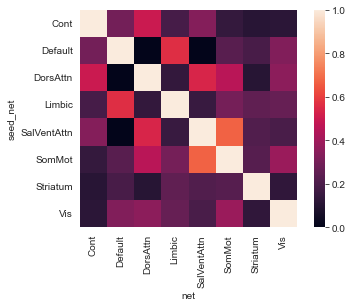

In [86]:
dfr_mean = dfr7.groupby(level=[0, 1, 3]).mean()
mean_ = dfr_mean.reorder_levels([1,0,2]).loc['baseline'].unstack()['r']
_ = seaborn.heatmap(mean_,vmin=0, vmax=1, square=True)

average connectivity in early

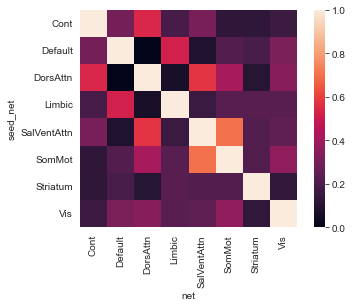

In [85]:
dfr_mean = dfr7.groupby(level=[0, 1, 3]).mean()
mean_ = dfr_mean.reorder_levels([1,0,2]).loc['early'].unstack()['r']
_ = seaborn.heatmap(mean_,vmin=0, vmax=1, square=True)

for 17 networks

In [61]:
dfcorr17 = seed_corr(net='17')
dfr17 = dfcorr17.round(4)
# important to round

networks: ['ContA', 'ContB', 'ContC', 'DefaultA', 'DefaultB', 'DefaultC', 'DorsAttnA', 'DorsAttnB', 'LimbicA', 'LimbicB', 'SalVentAttnA', 'SalVentAttnB', 'SomMotA', 'SomMotB', 'StriatumLeft', 'StriatumRight', 'TempPar', 'VisCent', 'VisPeri']


100%|██████████| 19/19 [01:27<00:00,  4.61s/it]


average connectivity in baseline

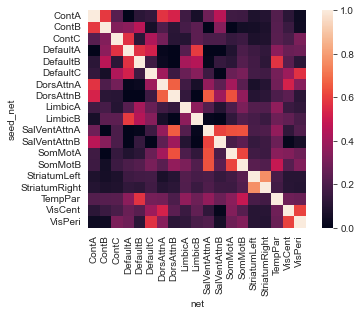

In [78]:
dfr_mean = dfr17.groupby(level=[0, 1, 3]).mean()
mean_ = dfr_mean.reorder_levels([1,0,2]).loc['baseline'].unstack()['r']
_ = seaborn.heatmap(mean_,vmin=0, vmax=1, square=True)

average connectivity in early

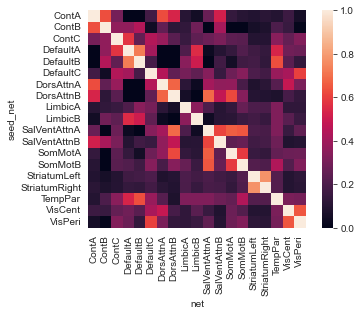

In [77]:
dfr_mean = dfr17.groupby(level=[0, 1, 3]).mean()
mean_ = dfr_mean.reorder_levels([1,0,2]).loc['early'].unstack()['r']
_ = seaborn.heatmap(mean_,vmin=0, vmax=1, square=True)

# shift between epochs

In [29]:
import pingouin as pg

In [30]:
def ttest_epochs(df):
    df.index = df.index.droplevel([0,1])
    df = df.unstack(0)
    df.columns = df.columns.droplevel(0)
    b2e = pg.ttest(df['early'], df['baseline'], paired=True, alternative='greater').loc['T-test']
    e2l = pg.ttest(df['late'], df['early'], paired=True, alternative='greater').loc['T-test']
    return pd.Series([b2e['T'], b2e['p-val'], e2l['T'], e2l['p-val']],
                     index=['b2e_t', 'b2e_p', 'e2l_t', 'e2l_p'])

In [32]:
dfp7 = dfr7.reorder_levels([0,3,1,2]).groupby(level=[0,1]).apply(ttest_epochs)

In [33]:
dfp7.head()

b2e_t     b2e_p     e2l_t     e2l_p
seed_net net                                                
Cont     Cont              NaN       NaN       NaN       NaN
         Default     -0.013792  0.505463  0.474575  0.319019
         DorsAttn     1.939664  0.030257 -1.283521  0.896129
         Limbic       0.087746  0.465289 -0.545873  0.705692
         SalVentAttn -0.732070  0.765500 -0.696040  0.754500

baseline to early

num of significant out of 64 nets: 6


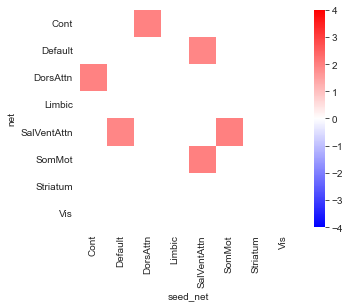

In [76]:
pair = 'b2e'
p = dfp7[pair+'_p']
print('num of significant out of',8*8, 'nets:',(p<.05).sum())
p = dfp7.unstack(0)[pair+'_p']
t = dfp7.unstack(0)[pair+'_t']
_ = seaborn.heatmap(t[p<.05], vmin=-4, vmax=4,cmap='bwr', square=True)

early to late

num of significant out of 64 nets: 12


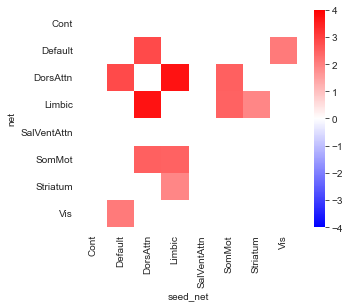

In [75]:
pair = 'e2l'
p = dfp7[pair+'_p']
print('num of significant out of',8*8, 'nets:',(p<.05).sum())
p = dfp7.unstack(0)[pair+'_p']
t = dfp7.unstack(0)[pair+'_t']
_ = seaborn.heatmap(t[p<.05], vmin=-4, vmax=4,cmap='bwr', square=True)

for 17 networks

In [64]:
dfp17 = dfr17.reorder_levels([0,3,1,2]).groupby(level=[0,1]).apply(ttest_epochs)

baseline to early

num of significant out of 361 nets: 60


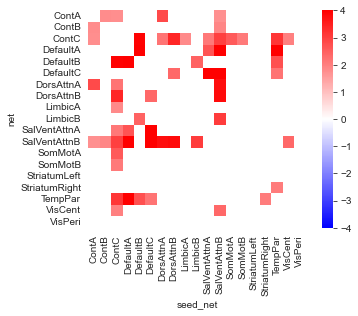

In [74]:
pair = 'b2e'
p = dfp17[pair+'_p']
print('num of significant out of',19*19, 'nets:',(p<.05).sum())
p = dfp17.unstack(0)[pair+'_p']
t = dfp17.unstack(0)[pair+'_t']
_ = seaborn.heatmap(t[p<.05], vmin=-4, vmax=4,cmap='bwr', square=True)

early to late

num of significant out of 361 nets: 42


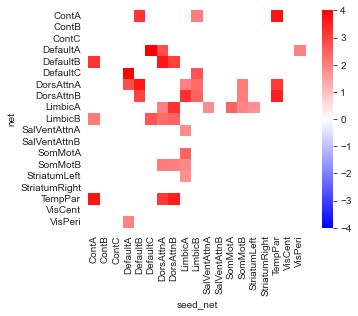

In [73]:
pair = 'e2l'
p = dfp17[pair+'_p']
print('num of significant out of',19*19, 'nets:',(p<.05).sum())
p = dfp17.unstack(0)[pair+'_p']
t = dfp17.unstack(0)[pair+'_t']
_ = seaborn.heatmap(t[p<.05], vmin=-4, vmax=4,cmap='bwr', square=True)

# correlate with behavioural scores

In [88]:
dfr7 = dfr7.reorder_levels([0,3,1,2])

In [89]:
df7 = dfr7.unstack(2)
df7 = df7['r']
df7['b2e'] = df7['early'] - df7['baseline']
df7['e2l'] = df7['late'] - df7['early']

In [91]:
df7.loc['Cont', 'Default']   # example link

epoch,baseline,early,late,b2e,e2l
subject,,,,,
1,0.5034,0.3668,0.4897,-0.1366,0.1229
2,0.4760,0.1046,0.3544,-0.3714,0.2498
3,0.1637,0.0457,0.2904,-0.1180,0.2447
4,0.3841,0.4403,0.2935,0.0562,-0.1468
6,0.1708,0.3536,0.1697,0.1828,-0.1839
7,0.3608,0.5109,0.5303,0.1501,0.0194
8,0.4355,0.1671,0.3192,-0.2684,0.1521
9,-0.0092,0.1447,-0.1385,0.1539,-0.2832
10,0.2016,0.1846,0.2789,-0.0170,0.0943


In [101]:
dfr17 = dfr17.reorder_levels([0,3,1,2])
df17 = dfr17.unstack(2)
df17 = df17['r']
df17['b2e'] = df17['early'] - df17['baseline']
df17['e2l'] = df17['late'] - df17['early']

In [103]:
# load behavioral data
metrics = pd.read_csv('data/metrics.csv').set_index('subject').drop(columns=['Subject'])
metrics

,tscore,RLScore
subject,,
1,-7.195868,-1.179789
2,-5.822339,1.104018
3,-2.248812,-0.302101
4,-6.593196,-1.400917
6,-15.539946,0.868475
7,-4.009663,0.859943
8,-6.426085,1.433999
9,-11.893333,-0.661215
10,-3.318209,-0.337563


In [ ]:
df7 = df7.join(metrics)
df17 = df17.join(metrics)

In [94]:
df7.head()

baseline  early  late  b2e  e2l     tscore   RLScore
seed_net net  subject                                                      
Cont     Cont 1             1.0    1.0   1.0  0.0  0.0  -7.195868 -1.179789
              2             1.0    1.0   1.0  0.0  0.0  -5.822339  1.104018
              3             1.0    1.0   1.0  0.0  0.0  -2.248812 -0.302101
              4             1.0    1.0   1.0  0.0  0.0  -6.593196 -1.400917
              6             1.0    1.0   1.0  0.0  0.0 -15.539946  0.868475

In [55]:
def r_value(data, x, y):   return pearsonr(data[x], data[y])[0]
def p_value(data, x, y):   return pearsonr(data[x], data[y])[1]

In [108]:
def plot_behaviour_shift(df, pair):
    p = df.groupby(level=[0,1]).apply(p_value, x=pair, y='RLScore')
    print('num of significant nets in', pair,(p<.05).sum())
    r = df.groupby(level=[0,1]).apply(r_value, x=pair, y='RLScore')
    r, p = r.unstack(), p.unstack()

    ax = seaborn.heatmap(r[p<.05], square=True)
    fig = ax.get_figure()
    # fig.savefig("plots/b2e-shift-vs-behavior-7net.png")

this is connectivity shift versus behavioural scores

num of significant nets in b2e 2


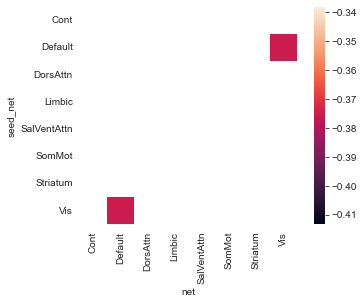

In [111]:
plot_behaviour_shift(df7, 'b2e')

num of significant nets in e2l 4


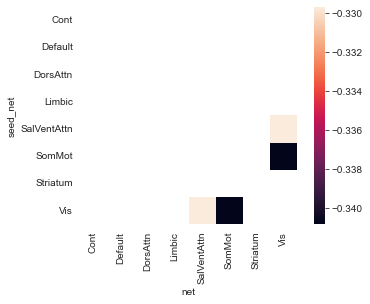

In [112]:
plot_behaviour_shift(df7, 'e2l')

num of significant nets in b2e 14


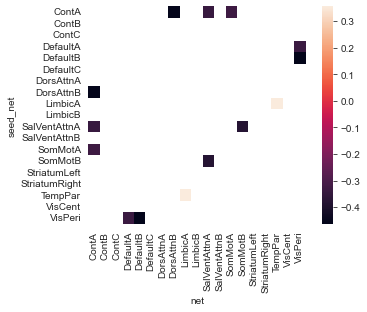

In [113]:
plot_behaviour_shift(df17, 'b2e')

num of significant nets in e2l 14


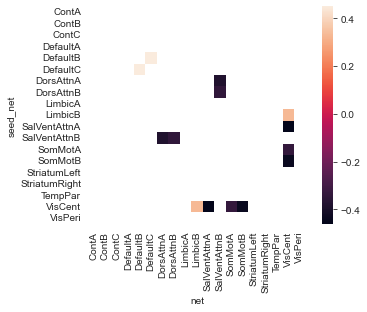

In [114]:
plot_behaviour_shift(df17, 'e2l')

appendix 1: test if b2e t-tests works actually

In [61]:
d = dfr7.loc['Default', 'DorsAttn']

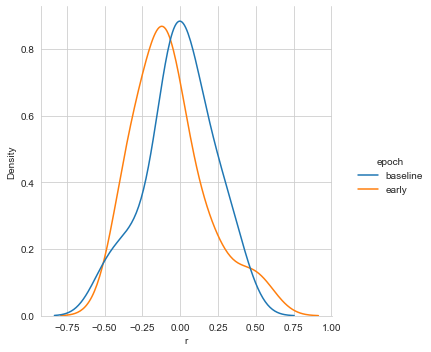

In [62]:
seaborn.displot(d.reset_index().iloc[:-36]
                , x='r', hue='epoch', kind='kde')

<AxesSubplot:xlabel='b2e', ylabel='RLScore'>

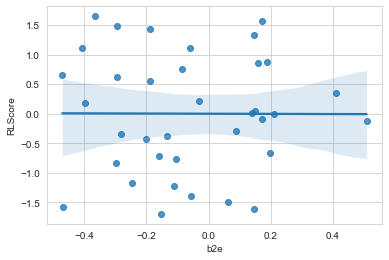

In [115]:
seaborn.regplot(data=df7.loc['Default', 'DorsAttn'], x='b2e', y='RLScore')   # example plot

In [63]:
d = d.unstack(0)['r']

In [64]:
d

epoch,baseline,early,late
subject,,,
1,0.0800,-0.1671,0.1889
2,0.2533,-0.1538,-0.0745
3,-0.0958,-0.0062,0.1560
4,0.0303,-0.0246,-0.0754
6,-0.3035,-0.1151,-0.2679
7,-0.0330,0.1264,0.1935
8,0.0915,-0.0959,0.1422
9,-0.3255,-0.1264,-0.2464
10,0.1855,-0.0970,0.3150


In [65]:
pg.ttest(d['early'],d['baseline'], alternative='greater', paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.526751,35,greater,0.932095,"[-0.13, inf]",0.267985,0.969,0.000636


In [66]:
d['b2e'] = d['early'] - d['baseline']

In [67]:
d

epoch,baseline,early,late,b2e
subject,,,,
1,0.0800,-0.1671,0.1889,-0.2471
2,0.2533,-0.1538,-0.0745,-0.4071
3,-0.0958,-0.0062,0.1560,0.0896
4,0.0303,-0.0246,-0.0754,-0.0549
6,-0.3035,-0.1151,-0.2679,0.1884
7,-0.0330,0.1264,0.1935,0.1594
8,0.0915,-0.0959,0.1422,-0.1874
9,-0.3255,-0.1264,-0.2464,0.1991
10,0.1855,-0.0970,0.3150,-0.2825


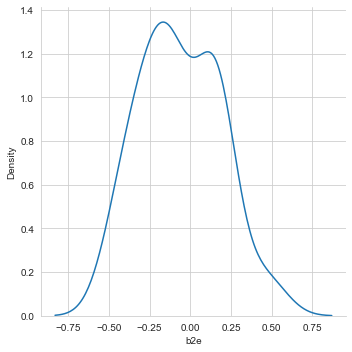

In [68]:
seaborn.displot(d['b2e'], kind='kde')

In [69]:
pg.ttest(d['b2e'],0, alternative='less', paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.526751,35,less,0.067905,"[-inf, 0.01]",0.254458,1.032,0.441297


appendix 2: comparing list of 1.'s with 1 that leads to false conclusion: 0.99999998 != 1